#### Step 1: Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style='whitegrid')

#### Step 2 : Create a random dataset to work on

In [32]:
from random import choice, randint
import datetime

products = ['A', 'B', 'C', 'D']
regions = ['North', 'South', 'East', 'West']
rows = []

for i in range(100):
    date = datetime.date(2024, 1, 1) + datetime.timedelta(days=i)
    product = choice(products)
    region = choice(regions)
    units = randint(50, 200)
    price = randint(30, 70)
    total = units * price
    rows.append([date, product, region, units, price, total])

df = pd.DataFrame(rows, columns=["Date", "Product", "Region", "Units Sold", "Unit Price", "Total Revenue"])
df.to_csv("sales_data.csv", index=False)

### Step 3: Load the Sales Data

df = pd.read_csv('sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df.head()

#### Step 4: Data Checks

In [38]:
print("Missing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe())

Missing values:
 Date             0
Product          0
Region           0
Units Sold       0
Unit Price       0
Total Revenue    0
dtype: int64

Summary stats:
                       Date  Units Sold  Unit Price  Total Revenue
count                  100  100.000000  100.000000     100.000000
mean   2024-02-19 12:00:00  131.530000   50.590000    6718.120000
min    2024-01-01 00:00:00   54.000000   30.000000    2240.000000
25%    2024-01-25 18:00:00  104.750000   41.000000    4552.500000
50%    2024-02-19 12:00:00  133.000000   50.500000    6237.000000
75%    2024-03-15 06:00:00  167.000000   61.250000    8970.250000
max    2024-04-09 00:00:00  200.000000   70.000000   13300.000000
std                    NaN   41.172084   11.699171    2813.448627


#### Step 5: Total Revenue by Region

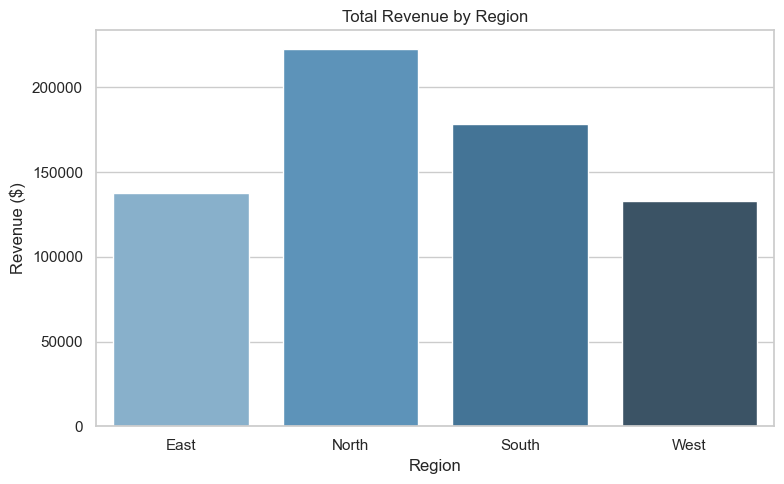

In [64]:
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales, x='Region', y='Total Revenue', hue='Region', palette='Blues_d', legend=False)
plt.title("Total Revenue by Region")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

#### Step 6: Monthly Sales Trend

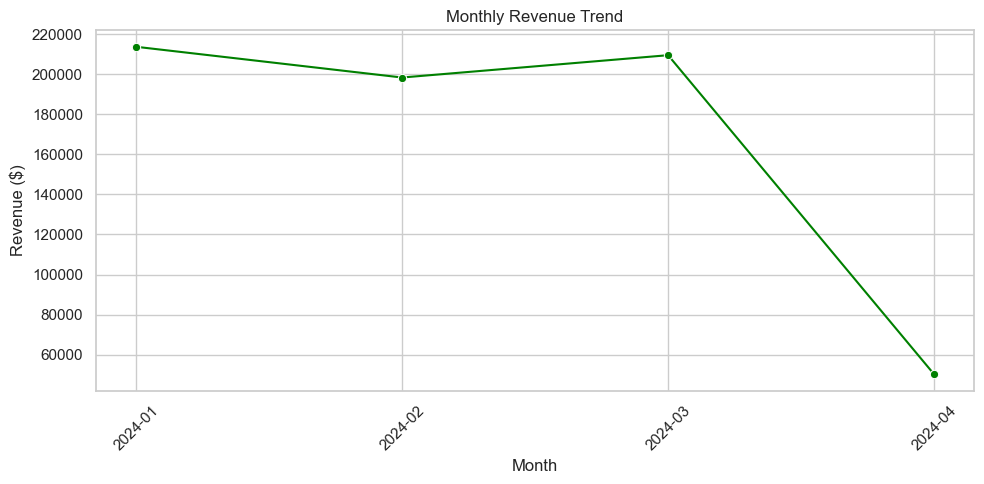

In [48]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Total Revenue', marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 7: Top-Selling Products

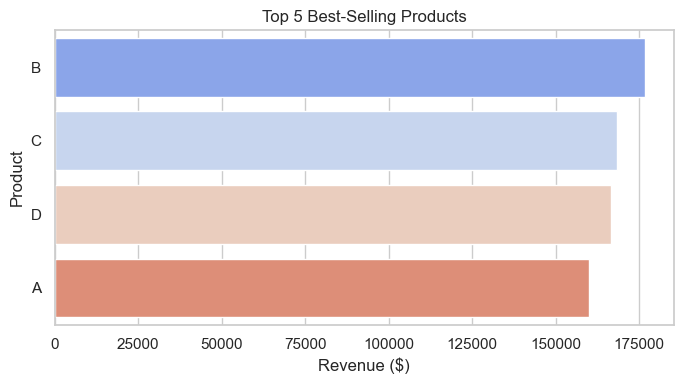

In [62]:
product_sales = df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(7, 4))
sns.barplot(x=product_sales.values, y=product_sales.index, hue=product_sales.index, palette='coolwarm', legend=False)
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Revenue ($)")
plt.tight_layout()
plt.show()

#### Step 8: Units Sold vs Revenue Scatterplot

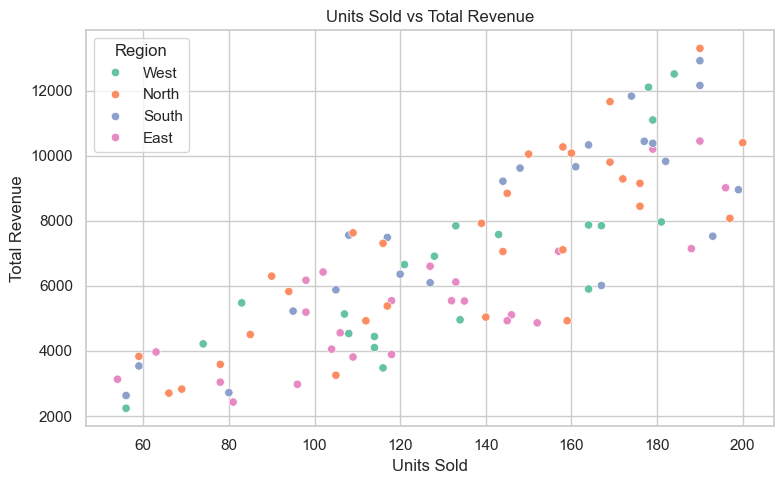

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Units Sold', y='Total Revenue', hue='Region', palette='Set2')
plt.title("Units Sold vs Total Revenue")
plt.tight_layout()
plt.show()